In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.models import *
from keras import layers
from model import *

import tensorflow as tf
import keras
from keras.models import *
from keras import layers
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error
from keras.preprocessing import *
from keras.preprocessing.image import img_to_array
from keras.callbacks import ModelCheckpoint
from tensorflow.python.ops import math_ops
from tensorflow.python.keras import backend as K
from tensorflow.python.framework import ops
from tensorflow.python.keras import initializers
from glob import glob
from tensorflow._api.v2.nn import depth_to_space
from function import *


In [18]:
# 하이퍼 파라미터

hidden_dim = 128
code_dim = 32
epochs = 10


In [19]:
# 데이터 불러오기

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [20]:
# 랜덤 노이즈 추가

noise_factor = 0.7
x_train_w_noise = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_w_noise = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_w_noise = np.clip(x_train_w_noise, 0.0, 1.0) # 0~1 제한
x_test_w_noise = np.clip(x_test_w_noise, 0.0, 1.0)


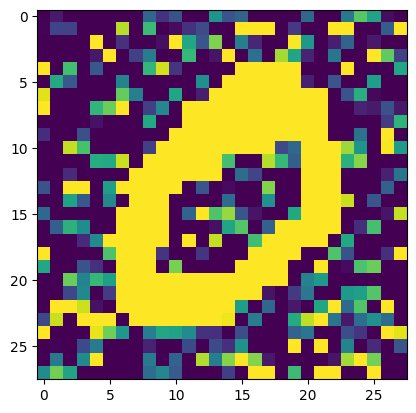

In [21]:
plt.imshow(x_train_w_noise[1])

Dense layer를 활용하기 위해 2차원 데이터를 1차원 데이터의 배열로 바꾸어줌.

In [22]:
# 정규화 및 차원 변경

x_train = x_train.reshape(-1, 28 * 28).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0

x_train_w_noise = x_train_w_noise.reshape(-1, 28 * 28).astype(np.float32) / 255.0
x_test_w_noise = x_test_w_noise.reshape(-1, 28 * 28).astype(np.float32) / 255.0

In [23]:
x_train[-1].shape

(784,)

In [24]:
# 모델

model = Autoencoder(x_train,hidden_dim=hidden_dim,code_dim=code_dim)

filename = './checkpoint/autoencoder_epoch{}.h5'.format(epochs)

model.compile(optimizer='adam', loss='binary_crossentropy')

callbacks = [ 

    ModelCheckpoint(filepath=filename,
                        monitor='binary_crossentropy',
                        save_weights_only=True, 
                        verbose=1,  
                        save_best_only=False,  
                        mode='auto')  
                        ]


model.fit(x_train_w_noise, x_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2550
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1973
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1684
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1570
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1516
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1420
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1337
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1308


In [25]:
x_test.shape

(10000, 784)

In [26]:
decoded_imgs = model.predict(x_test_w_noise)

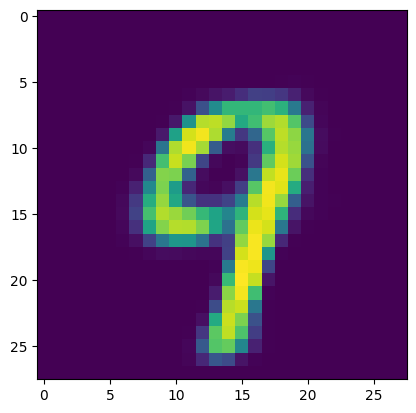

In [27]:
plt.imshow(decoded_imgs[12].reshape(28,28))


Text(0.5, 1.0, 'decoded_imgs')

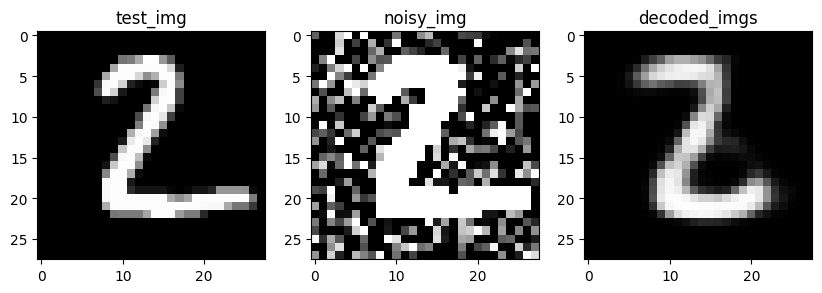

In [30]:
fig, axes = plt.subplots(1,3, figsize = (10,5))

axes[0].imshow(x_test[1].reshape(28,28),cmap='gray')
axes[1].imshow(x_test_w_noise[1].reshape(28,28),cmap='gray')
axes[2].imshow(decoded_imgs[1].reshape(28,28),cmap='gray')  

axes[0].set_title('test_img')
axes[1].set_title('noisy_img')
axes[2].set_title('decoded_imgs')